## PREPARACIÓN DE LOS DATOS
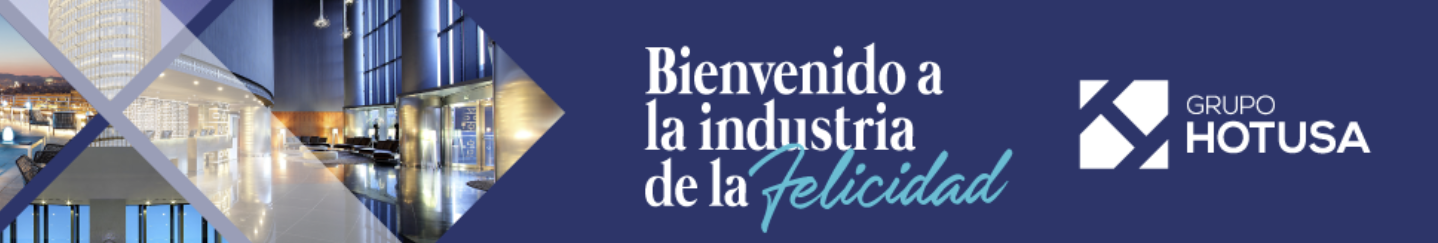

In [2]:
# Importamos las librerías que vamos a usar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from datetime import datetime
from sklearn.preprocessing import OrdinalEncoder

c:\Users\TESTER\anaconda3\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\Users\TESTER\anaconda3\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [3]:
df = pd.read_csv("data/hotusa_cancellations.csv")
df.head(10)

Unnamed: 0  HotelId ReservationStatusDate ArrivalDate  LeadTime  \
0       10043        1            2016-12-15  2017-02-10       238   
1       19043        1            2015-12-07  2016-05-27       174   
2        3509        1            2015-08-24  2015-12-20       260   
3        5012        1            2016-01-05  2016-04-12       168   
4       17991        1            2015-11-11  2015-11-11         1   
5       12189        1            2017-06-07  2017-06-17       145   
6       12267        1            2017-06-10  2017-06-21        17   
7        3932        1            2016-02-02  2016-02-08       102   
8        4409        1            2016-03-08  2016-03-13        25   
9       11879        1            2016-10-31  2017-06-02       219   

   StaysInWeekendNights  StaysInWeekNights  Adults  Children     CustomerType  \
0                     0                  2       2         0        Transient   
1                     2                  5       2         1        Transient   
2                     4                  9       1         0        Transient   
3                     0                  2       2         0        Transient   
4                     0                  1       1         0        Transient   
5                     2                  3       2         0        Transient   
6                     0                  3       2         0        Transient   
7                     1                  2       2         0  Transient-Party   
8                     2                  2       2         0        Transient   
9                     2                  5       2         0         Contract   

      ADR       Meal Country      Company  ReservedRoomType  IsRepeatedGuest  \
0   54.00  HB            PRT         NULL  A                           False   
1  108.02  BB            PRT         NULL  F                           False   
2   47.54  BB            PRT         NULL  D                           False   
3   86.00  HB            PRT         NULL  A                           False   
4   35.00  BB            PRT           88  A                            True   
5  100.80  BB            PRT         NULL  E                           False   
6  155.00  BB            ISR         NULL  D                           False   
7   50.00  HB            PRT         NULL  A                           False   
8   46.40  BB            PRT         NULL  D                           False   
9   93.50  BB            PRT         NULL  D                           False   

   IsCanceled  
0        True  
1        True  
2        True  
3        True  
4        True  
5        True  
6        True  
7        True  
8        True  
9        True

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33688 entries, 0 to 33687
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             33688 non-null  int64  
 1   HotelId                33688 non-null  int64  
 2   ReservationStatusDate  33688 non-null  object 
 3   ArrivalDate            33688 non-null  object 
 4   LeadTime               33688 non-null  int64  
 5   StaysInWeekendNights   33688 non-null  int64  
 6   StaysInWeekNights      33688 non-null  int64  
 7   Adults                 33688 non-null  int64  
 8   Children               33688 non-null  int64  
 9   CustomerType           33688 non-null  object 
 10  ADR                    33688 non-null  float64
 11  Meal                   33688 non-null  object 
 12  Country                33256 non-null  object 
 13  Company                33688 non-null  object 
 14  ReservedRoomType       33688 non-null  object 
 15  Is

In [58]:
df.describe()

Unnamed: 0  HotelId      LeadTime  StaysInWeekendNights  \
count  33688.000000  33688.0  33688.000000          33688.000000   
mean   22133.238898      1.0     85.972839              1.163649   
std    11298.730622      0.0     95.587656              1.147904   
min        0.000000      1.0      0.000000              0.000000   
25%    14232.750000      1.0      7.000000              0.000000   
50%    23197.500000      1.0     47.000000              1.000000   
75%    31634.250000      1.0    145.000000              2.000000   
max    40059.000000      1.0    737.000000             19.000000   

       StaysInWeekNights        Adults      Children           ADR  
count       33688.000000  33688.000000  33688.000000  33688.000000  
mean            3.074121      1.850303      0.117965     92.892934  
std             2.465181      0.537657      0.421017     60.278815  
min             0.000000      0.000000      0.000000     -6.380000  
25%             1.000000      2.000000      0.000000     49.500000  
50%             3.000000      2.000000      0.000000     74.000000  
75%             5.000000      2.000000      0.000000    121.250000  
max            50.000000     27.000000      3.000000    508.000000

In [59]:
df.columns

Index(['Unnamed: 0', 'HotelId', 'ReservationStatusDate', 'ArrivalDate',
       'LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults',
       'Children', 'CustomerType', 'ADR', 'Meal', 'Country', 'Company',
       'ReservedRoomType', 'IsRepeatedGuest', 'IsCanceled'],
      dtype='object')

In [60]:
df.isnull().sum()

Unnamed: 0                 0
HotelId                    0
ReservationStatusDate      0
ArrivalDate                0
LeadTime                   0
StaysInWeekendNights       0
StaysInWeekNights          0
Adults                     0
Children                   0
CustomerType               0
ADR                        0
Meal                       0
Country                  432
Company                    0
ReservedRoomType           0
IsRepeatedGuest            0
IsCanceled                 0
dtype: int64

### ReservationStatusDate y ArrivalDate
##### Nos quedamos con los meses de las reservas y las estancias (qne nos aportan la Estacionalidad) así como LeadTime que es uno de los datos más relevantes y eliminamos las fechas originales.

In [61]:
# En qué meses se producen más estancias

df["ArrivalDate"] = pd.to_datetime(df["ArrivalDate"])
df["Mes_Estancia"] = df["ArrivalDate"].dt.month
df["Mes_Estancia"]

# En qué meses se producen más reservas

df["ReservationStatusDate"] = pd.to_datetime(df["ReservationStatusDate"])
df["Mes_Reserva"] = df["ReservationStatusDate"].dt.month
df["Mes_Reserva"] 

df.drop(["ReservationStatusDate","ArrivalDate"], axis = 1, inplace = True)
df

Unnamed: 0  HotelId  LeadTime  StaysInWeekendNights  StaysInWeekNights  \
0           10043        1       238                     0                  2   
1           19043        1       174                     2                  5   
2            3509        1       260                     4                  9   
3            5012        1       168                     0                  2   
4           17991        1         1                     0                  1   
...           ...      ...       ...                   ...                ...   
33683       40055        1       212                     2                  8   
33684       40056        1       169                     2                  9   
33685       40057        1       204                     4                 10   
33686       40058        1       211                     4                 10   
33687       40059        1       161                     4                 10   

       Adults  Children     CustomerType     ADR       Meal Country  \
0           2         0        Transient   54.00  HB            PRT   
1           2         1        Transient  108.02  BB            PRT   
2           1         0        Transient   47.54  BB            PRT   
3           2         0        Transient   86.00  HB            PRT   
4           1         0        Transient   35.00  BB            PRT   
...       ...       ...              ...     ...        ...     ...   
33683       2         1        Transient   89.75  BB            GBR   
33684       2         0  Transient-Party  202.27  BB            IRL   
33685       2         0        Transient  153.57  BB            IRL   
33686       2         0         Contract  112.80  HB            GBR   
33687       2         0        Transient   99.06  HB            DEU   

           Company  ReservedRoomType  IsRepeatedGuest  IsCanceled  \
0             NULL  A                           False        True   
1             NULL  F                           False        True   
2             NULL  D                           False        True   
3             NULL  A                           False        True   
4               88  A                            True        True   
...            ...               ...              ...         ...   
33683         NULL  A                           False       False   
33684         NULL  E                           False       False   
33685         NULL  E                           False       False   
33686         NULL  D                           False       False   
33687         NULL  A                           False       False   

       Mes_Estancia  Mes_Reserva  
0                 2           12  
1                 5           12  
2                12            8  
3                 4            1  
4                11           11  
...             ...          ...  
33683             8            9  
33684             8            9  
33685             8            9  
33686             8            9  
33687             8            9  

[33688 rows x 17 columns]

In [62]:
df["Mes_Estancia"].value_counts()
df["Mes_Reserva"].value_counts()

8     3595
7     3437
4     2967
10    2956
3     2931
5     2912
2     2691
1     2653
9     2510
6     2500
11    2420
12    2116
Name: Mes_Reserva, dtype: int64

In [63]:
df[df["LeadTime"]>700].groupby(df["IsCanceled"]==1).max()

Unnamed: 0  HotelId  LeadTime  StaysInWeekendNights  \
IsCanceled                                                        
False             4182        1       737                     8   

            StaysInWeekNights  Adults  Children CustomerType   ADR       Meal  \
IsCanceled                                                                      
False                      20       2         0    Transient  68.0  HB          

           Country      Company  ReservedRoomType  IsRepeatedGuest  \
IsCanceled                                                           
False          PRT         NULL  E                           False   

            IsCanceled  Mes_Estancia  Mes_Reserva  
IsCanceled                                         
False            False             7            7

### CustomerType
##### Aporta una información interesante, añadimos 4 nuevas columnas Contract, Group, Transient y Transient-Party. Aportan poco valor a la predicción de cancelaciones.

In [64]:
df["CustomerType"].unique()
rooms = pd.get_dummies(data = df["CustomerType"], drop_first = False)
df = pd.concat([df, rooms], axis = 1)

df.drop(["CustomerType"], axis = 1, inplace = True)
    
df

Unnamed: 0  HotelId  LeadTime  StaysInWeekendNights  StaysInWeekNights  \
0           10043        1       238                     0                  2   
1           19043        1       174                     2                  5   
2            3509        1       260                     4                  9   
3            5012        1       168                     0                  2   
4           17991        1         1                     0                  1   
...           ...      ...       ...                   ...                ...   
33683       40055        1       212                     2                  8   
33684       40056        1       169                     2                  9   
33685       40057        1       204                     4                 10   
33686       40058        1       211                     4                 10   
33687       40059        1       161                     4                 10   

       Adults  Children     ADR       Meal Country      Company  \
0           2         0   54.00  HB            PRT         NULL   
1           2         1  108.02  BB            PRT         NULL   
2           1         0   47.54  BB            PRT         NULL   
3           2         0   86.00  HB            PRT         NULL   
4           1         0   35.00  BB            PRT           88   
...       ...       ...     ...        ...     ...          ...   
33683       2         1   89.75  BB            GBR         NULL   
33684       2         0  202.27  BB            IRL         NULL   
33685       2         0  153.57  BB            IRL         NULL   
33686       2         0  112.80  HB            GBR         NULL   
33687       2         0   99.06  HB            DEU         NULL   

       ReservedRoomType  IsRepeatedGuest  IsCanceled  Mes_Estancia  \
0      A                           False        True             2   
1      F                           False        True             5   
2      D                           False        True            12   
3      A                           False        True             4   
4      A                            True        True            11   
...                 ...              ...         ...           ...   
33683  A                           False       False             8   
33684  E                           False       False             8   
33685  E                           False       False             8   
33686  D                           False       False             8   
33687  A                           False       False             8   

       Mes_Reserva  Contract  Group  Transient  Transient-Party  
0               12         0      0          1                0  
1               12         0      0          1                0  
2                8         0      0          1                0  
3                1         0      0          1                0  
4               11         0      0          1                0  
...            ...       ...    ...        ...              ...  
33683            9         0      0          1                0  
33684            9         0      0          0                1  
33685            9         0      0          1                0  
33686            9         1      0          0                0  
33687            9         0      0          1                0  

[33688 rows x 20 columns]

### Meal
##### Tipos de servicios asociados a la reserva: Self Catering SC, Bed and Breakfast BB, Half Board HB, Full Board FB y Undefined. Apenas aportan valor para predecir las cancelaciones.

In [65]:
df["Meal"] = df["Meal"].str.rstrip()
df["Meal"].unique()

# Para unir estas nuevas columnas a df_cat podemos hacer un pd.concat()

dfmeal =  pd.get_dummies(data = df["Meal"], drop_first = False)
df = pd.concat([df, dfmeal], axis = 1)
df.drop(["Meal"], axis = 1, inplace = True)
df

Unnamed: 0  HotelId  LeadTime  StaysInWeekendNights  StaysInWeekNights  \
0           10043        1       238                     0                  2   
1           19043        1       174                     2                  5   
2            3509        1       260                     4                  9   
3            5012        1       168                     0                  2   
4           17991        1         1                     0                  1   
...           ...      ...       ...                   ...                ...   
33683       40055        1       212                     2                  8   
33684       40056        1       169                     2                  9   
33685       40057        1       204                     4                 10   
33686       40058        1       211                     4                 10   
33687       40059        1       161                     4                 10   

       Adults  Children     ADR Country      Company  ... Mes_Reserva  \
0           2         0   54.00     PRT         NULL  ...          12   
1           2         1  108.02     PRT         NULL  ...          12   
2           1         0   47.54     PRT         NULL  ...           8   
3           2         0   86.00     PRT         NULL  ...           1   
4           1         0   35.00     PRT           88  ...          11   
...       ...       ...     ...     ...          ...  ...         ...   
33683       2         1   89.75     GBR         NULL  ...           9   
33684       2         0  202.27     IRL         NULL  ...           9   
33685       2         0  153.57     IRL         NULL  ...           9   
33686       2         0  112.80     GBR         NULL  ...           9   
33687       2         0   99.06     DEU         NULL  ...           9   

       Contract  Group  Transient  Transient-Party  BB  FB  HB  SC  Undefined  
0             0      0          1                0   0   0   1   0          0  
1             0      0          1                0   1   0   0   0          0  
2             0      0          1                0   1   0   0   0          0  
3             0      0          1                0   0   0   1   0          0  
4             0      0          1                0   1   0   0   0          0  
...         ...    ...        ...              ...  ..  ..  ..  ..        ...  
33683         0      0          1                0   1   0   0   0          0  
33684         0      0          0                1   1   0   0   0          0  
33685         0      0          1                0   1   0   0   0          0  
33686         1      0          0                0   0   0   1   0          0  
33687         0      0          1                0   0   0   1   0          0  

[33688 rows x 24 columns]

### Country
##### Eliminamos los NaN y convertimos el texto en números. También es una característica relativamente importante para las predicciones. 

In [66]:
df["Country"] = df["Country"].fillna("NO_COUNTRY")
df["Country"].unique()

array(['PRT', 'ISR', 'BRA', 'AUT', 'GBR', 'IRL', 'RUS', 'ESP', 'SVK',
       'SWE', 'GEO', 'FRA', 'CHE', 'DEU', 'ITA', 'USA', 'NO_COUNTRY',
       'CN', 'POL', 'NLD', 'MAR', 'LUX', 'BEL', 'HUN', 'ZAF', 'ROU',
       'PHL', 'AGO', 'NOR', 'NGA', 'AUS', 'ARG', 'HRV', 'MDV', 'PAK',
       'FIN', 'IDN', 'BLR', 'CZE', 'CHN', 'ARE', 'EST', 'LBN', 'GIB',
       'DNK', 'SVN', 'TUR', 'LVA', 'AZE', 'ALB', 'KOR', 'KWT', 'GRC',
       'URY', 'CHL', 'IND', 'OMN', 'MOZ', 'BWA', 'MEX', 'UKR', 'SMR',
       'PRI', 'SRB', 'LTU', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'CRI',
       'JAM', 'IRN', 'CAF', 'CYP', 'NZL', 'KAZ', 'THA', 'COL', 'DOM',
       'MKD', 'MYS', 'VEN', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH',
       'MUS', 'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP',
       'BDI', 'SAU', 'AND', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT',
       'MWI', 'ECU', 'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO',
       'TWN', 'HKG', 'DJI'], dtype=object)

In [67]:
# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[['PRT', 'ISR', 'BRA', 'AUT', 'GBR', 'IRL', 'RUS', 'ESP', 'SVK',
       'SWE', 'GEO', 'FRA', 'CHE', 'DEU', 'ITA', 'USA', 'NO_COUNTRY',
       'CN', 'POL', 'NLD', 'MAR', 'LUX', 'BEL', 'HUN', 'ZAF', 'ROU',
       'PHL', 'AGO', 'NOR', 'NGA', 'AUS', 'ARG', 'HRV', 'MDV', 'PAK',
       'FIN', 'IDN', 'BLR', 'CZE', 'CHN', 'ARE', 'EST', 'LBN', 'GIB',
       'DNK', 'SVN', 'TUR', 'LVA', 'AZE', 'ALB', 'KOR', 'KWT', 'GRC',
       'URY', 'CHL', 'IND', 'OMN', 'MOZ', 'BWA', 'MEX', 'UKR', 'SMR',
       'PRI', 'SRB', 'LTU', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'CRI',
       'JAM', 'IRN', 'CAF', 'CYP', 'NZL', 'KAZ', 'THA', 'COL', 'DOM',
       'MKD', 'MYS', 'VEN', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH',
       'MUS', 'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP',
       'BDI', 'SAU', 'AND', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT',
       'MWI', 'ECU', 'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO',
       'TWN', 'HKG', 'DJI']])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(df[["Country"]])
df["Country"] = encoder.transform(df[["Country"]])
df["Country"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
33683     4.0
33684     5.0
33685     5.0
33686     4.0
33687    13.0
Name: Country, Length: 33688, dtype: float64

### Company
##### Eliminamos espacios y convertimos los datos a numéricos

In [68]:
# df = pd.read_csv("hotusa_cancellations.csv")

df["Company"]= df["Company"].str.lstrip()
df["Company"]= df["Company"].replace(to_replace="NULL",value=0)
df["Company"] = df["Company"].astype(int)
df["Company"].unique()

array([  0,  88, 543, 270, 223,  53, 281,  20, 457, 331, 395, 286, 477,
       513, 169, 292, 195, 498, 203, 269, 135, 307, 445, 356, 308,  82,
        59,  51,  94, 110, 263, 154, 174,  86, 250,  47, 405, 178, 416,
       461, 113,  31,  34, 421, 342,  83,  84,  81, 367, 504, 240, 144,
       268, 204, 312, 318, 274, 317, 118,  12, 324, 371, 337, 528,  62,
       120,  42, 116, 530, 103, 112,   9,  39,  16,  92,  61, 501, 165,
       291, 290,  43, 325, 192, 108, 200, 224, 388, 465, 287, 297, 490,
       482, 207, 282, 437, 225, 329, 272,  28, 338,  72, 246, 319, 146,
       159, 380, 323, 511, 407, 278,  80, 403, 399,  14, 137, 343, 346,
       347, 349, 289, 351, 355, 353,  54,  99, 358, 361, 390, 362, 366,
       372, 365, 277, 109, 377, 379,  22, 378, 330, 364, 360, 401, 232,
       255, 384, 167, 212, 514, 391, 400, 376, 392, 402, 396, 302, 398,
         6, 370, 397, 369, 409, 251, 168, 104, 428, 382, 408, 413, 148,
        10, 333, 419, 415, 424, 425, 423, 422, 435, 439, 442, 44

In [69]:
df

Unnamed: 0  HotelId  LeadTime  StaysInWeekendNights  StaysInWeekNights  \
0           10043        1       238                     0                  2   
1           19043        1       174                     2                  5   
2            3509        1       260                     4                  9   
3            5012        1       168                     0                  2   
4           17991        1         1                     0                  1   
...           ...      ...       ...                   ...                ...   
33683       40055        1       212                     2                  8   
33684       40056        1       169                     2                  9   
33685       40057        1       204                     4                 10   
33686       40058        1       211                     4                 10   
33687       40059        1       161                     4                 10   

       Adults  Children     ADR  Country  Company  ... Mes_Reserva  Contract  \
0           2         0   54.00      0.0        0  ...          12         0   
1           2         1  108.02      0.0        0  ...          12         0   
2           1         0   47.54      0.0        0  ...           8         0   
3           2         0   86.00      0.0        0  ...           1         0   
4           1         0   35.00      0.0       88  ...          11         0   
...       ...       ...     ...      ...      ...  ...         ...       ...   
33683       2         1   89.75      4.0        0  ...           9         0   
33684       2         0  202.27      5.0        0  ...           9         0   
33685       2         0  153.57      5.0        0  ...           9         0   
33686       2         0  112.80      4.0        0  ...           9         1   
33687       2         0   99.06     13.0        0  ...           9         0   

       Group  Transient  Transient-Party  BB  FB  HB  SC  Undefined  
0          0          1                0   0   0   1   0          0  
1          0          1                0   1   0   0   0          0  
2          0          1                0   1   0   0   0          0  
3          0          1                0   0   0   1   0          0  
4          0          1                0   1   0   0   0          0  
...      ...        ...              ...  ..  ..  ..  ..        ...  
33683      0          1                0   1   0   0   0          0  
33684      0          0                1   1   0   0   0          0  
33685      0          1                0   1   0   0   0          0  
33686      0          0                0   0   0   1   0          0  
33687      0          1                0   0   0   1   0          0  

[33688 rows x 24 columns]

## Tipo de Habitación Reservada
##### Eliminamos espacios y convertimos los datos a numéricos

In [70]:
# Limpiamos los espacios vacíos
df["ReservedRoomType"].unique()
df["ReservedRoomType"] = df["ReservedRoomType"].str.rstrip()
df["ReservedRoomType"].unique()

from sklearn.preprocessing import OrdinalEncoder

# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[[ "A", "B", "C", "D", "E", "F", "G", "H", "L"]])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(df[["ReservedRoomType"]])
df["ReservedRoomType"] = encoder.transform(df[["ReservedRoomType"]])
df["ReservedRoomType"]

0        0.0
1        5.0
2        3.0
3        0.0
4        0.0
        ... 
33683    0.0
33684    4.0
33685    4.0
33686    3.0
33687    0.0
Name: ReservedRoomType, Length: 33688, dtype: float64

In [71]:
df["ReservedRoomType"].value_counts()

0.0    19760
3.0     6278
4.0     4183
6.0     1251
5.0     1000
2.0      727
7.0      481
8.0        5
1.0        3
Name: ReservedRoomType, dtype: int64

In [72]:
df[df["ReservedRoomType"]==8]

Unnamed: 0  HotelId  LeadTime  StaysInWeekendNights  StaysInWeekNights  \
3543         504        1         0                     0                  1   
5036         354        1         0                     1                  1   
5379         911        1         0                     0                  1   
9154       14570        1         0                     0                  1   
9882       15855        1         0                     0                  1   

      Adults  Children    ADR  Country  Company  ...  Mes_Reserva  Contract  \
3543       2         0  136.0      0.0        0  ...            7         0   
5036       4         0  150.0      0.0        0  ...            7         0   
5379       2         0  200.0      0.0        0  ...            8         0   
9154       1         0   82.0      0.0        0  ...            7         0   
9882       2         0  172.0      0.0        0  ...            8         0   

      Group  Transient  Transient-Party  BB  FB  HB  SC  Undefined  
3543      0          1                0   1   0   0   0          0  
5036      0          1                0   1   0   0   0          0  
5379      0          1                0   1   0   0   0          0  
9154      0          1                0   1   0   0   0          0  
9882      0          1                0   1   0   0   0          0  

[5 rows x 24 columns]

In [73]:
df[df["ReservedRoomType"]==1]

Unnamed: 0  HotelId  LeadTime  StaysInWeekendNights  StaysInWeekNights  \
9825        15796        1        25                     0                  2   
29297       35668        1         0                     0                  1   
29522       35893        1         0                     0                  1   

       Adults  Children    ADR  Country  Company  ...  Mes_Reserva  Contract  \
9825        2         0  134.0      7.0        0  ...            8         0   
29297       2         0  110.0      0.0        0  ...            4         0   
29522       2         0   70.0      0.0        0  ...            5         0   

       Group  Transient  Transient-Party  BB  FB  HB  SC  Undefined  
9825       0          1                0   1   0   0   0          0  
29297      0          1                0   1   0   0   0          0  
29522      0          1                0   1   0   0   0          0  

[3 rows x 24 columns]

### IsRepeatedGuest IsCanceled
##### Las columnas booleanas, True or False, pasan a ser 1 o 0

In [74]:
df["IsRepeatedGuest"] = pd.get_dummies(data = df["IsRepeatedGuest"], drop_first = True)
df

Unnamed: 0  HotelId  LeadTime  StaysInWeekendNights  StaysInWeekNights  \
0           10043        1       238                     0                  2   
1           19043        1       174                     2                  5   
2            3509        1       260                     4                  9   
3            5012        1       168                     0                  2   
4           17991        1         1                     0                  1   
...           ...      ...       ...                   ...                ...   
33683       40055        1       212                     2                  8   
33684       40056        1       169                     2                  9   
33685       40057        1       204                     4                 10   
33686       40058        1       211                     4                 10   
33687       40059        1       161                     4                 10   

       Adults  Children     ADR  Country  Company  ...  Mes_Reserva  Contract  \
0           2         0   54.00      0.0        0  ...           12         0   
1           2         1  108.02      0.0        0  ...           12         0   
2           1         0   47.54      0.0        0  ...            8         0   
3           2         0   86.00      0.0        0  ...            1         0   
4           1         0   35.00      0.0       88  ...           11         0   
...       ...       ...     ...      ...      ...  ...          ...       ...   
33683       2         1   89.75      4.0        0  ...            9         0   
33684       2         0  202.27      5.0        0  ...            9         0   
33685       2         0  153.57      5.0        0  ...            9         0   
33686       2         0  112.80      4.0        0  ...            9         1   
33687       2         0   99.06     13.0        0  ...            9         0   

       Group  Transient  Transient-Party  BB  FB  HB  SC  Undefined  
0          0          1                0   0   0   1   0          0  
1          0          1                0   1   0   0   0          0  
2          0          1                0   1   0   0   0          0  
3          0          1                0   0   0   1   0          0  
4          0          1                0   1   0   0   0          0  
...      ...        ...              ...  ..  ..  ..  ..        ...  
33683      0          1                0   1   0   0   0          0  
33684      0          0                1   1   0   0   0          0  
33685      0          1                0   1   0   0   0          0  
33686      0          0                0   0   0   1   0          0  
33687      0          1                0   0   0   1   0          0  

[33688 rows x 24 columns]

In [75]:
df["IsCanceled"] = pd.get_dummies(data = df["IsCanceled"], drop_first = True)
df

Unnamed: 0  HotelId  LeadTime  StaysInWeekendNights  StaysInWeekNights  \
0           10043        1       238                     0                  2   
1           19043        1       174                     2                  5   
2            3509        1       260                     4                  9   
3            5012        1       168                     0                  2   
4           17991        1         1                     0                  1   
...           ...      ...       ...                   ...                ...   
33683       40055        1       212                     2                  8   
33684       40056        1       169                     2                  9   
33685       40057        1       204                     4                 10   
33686       40058        1       211                     4                 10   
33687       40059        1       161                     4                 10   

       Adults  Children     ADR  Country  Company  ...  Mes_Reserva  Contract  \
0           2         0   54.00      0.0        0  ...           12         0   
1           2         1  108.02      0.0        0  ...           12         0   
2           1         0   47.54      0.0        0  ...            8         0   
3           2         0   86.00      0.0        0  ...            1         0   
4           1         0   35.00      0.0       88  ...           11         0   
...       ...       ...     ...      ...      ...  ...          ...       ...   
33683       2         1   89.75      4.0        0  ...            9         0   
33684       2         0  202.27      5.0        0  ...            9         0   
33685       2         0  153.57      5.0        0  ...            9         0   
33686       2         0  112.80      4.0        0  ...            9         1   
33687       2         0   99.06     13.0        0  ...            9         0   

       Group  Transient  Transient-Party  BB  FB  HB  SC  Undefined  
0          0          1                0   0   0   1   0          0  
1          0          1                0   1   0   0   0          0  
2          0          1                0   1   0   0   0          0  
3          0          1                0   0   0   1   0          0  
4          0          1                0   1   0   0   0          0  
...      ...        ...              ...  ..  ..  ..  ..        ...  
33683      0          1                0   1   0   0   0          0  
33684      0          0                1   1   0   0   0          0  
33685      0          1                0   1   0   0   0          0  
33686      0          0                0   0   0   1   0          0  
33687      0          1                0   0   0   1   0          0  

[33688 rows x 24 columns]

In [76]:
df["IsCanceled"].value_counts()

0    28938
1     4750
Name: IsCanceled, dtype: int64

In [77]:
# Sólo hay datos de un hotel, se puede eliminar la columna
df["HotelId"].value_counts()

1    33688
Name: HotelId, dtype: int64

In [78]:
# La columna de anonimización de los clientes son todos valores únicos, no aporta información valiosa.
df["Unnamed: 0"].value_counts()

10043    1
28830    1
28828    1
28827    1
28826    1
        ..
17312    1
17311    1
17310    1
17309    1
40059    1
Name: Unnamed: 0, Length: 33688, dtype: int64

In [79]:
# Eliminamos el HotelId y Unnamed: 0 porque no aportan información.

df.drop(["HotelId", "Unnamed: 0"], axis=1, inplace=True)

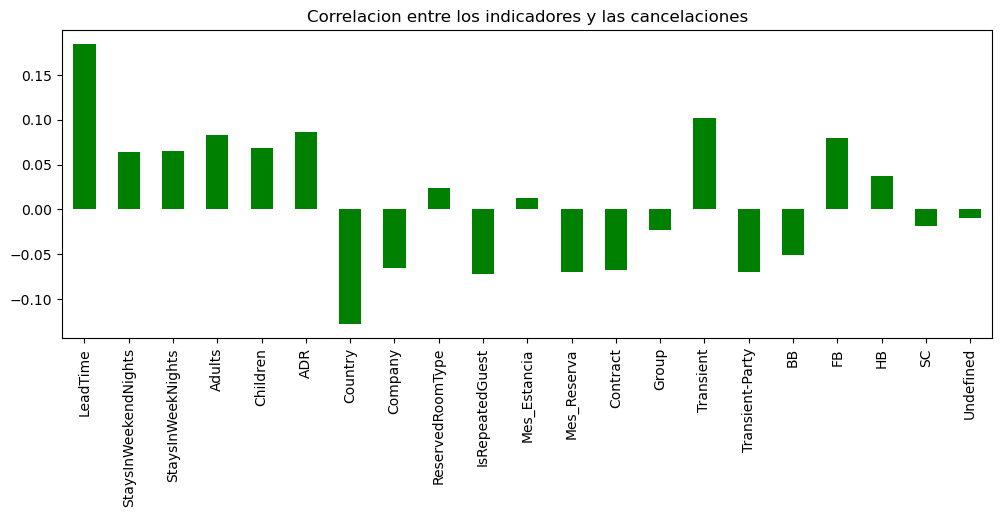

In [80]:
# Comprobamos la correlación entre las variables y las cancelaciones
df.drop('IsCanceled', axis=1).corrwith(df.IsCanceled).plot( kind='bar', 
                                                            figsize=(12, 4), 
                                                            title="Correlacion entre los indicadores y las cancelaciones", 
                                                            color="green")                                                          
%matplotlib inline
plt.savefig("data/correlaciones.png")

In [81]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [82]:
# No hay adultos ni niños pero las reservas no se cancelan
df[df["Adults"]==0]

LeadTime  StaysInWeekendNights  StaysInWeekNights  Adults  Children  \
6165          1                     0                  3       0         0   
6281          0                     0                  0       0         0   
6790         36                     1                  2       0         0   
7052        165                     1                  4       0         0   
7073        165                     2                  4       0         0   
25401        31                     2                  8       0         0   
25665         4                     0                  1       0         0   
26458        46                     3                  9       0         0   
28478        15                     2                  6       0         0   
28484        15                     2                  6       0         0   
31087         1                     2                  5       0         0   

        ADR  Country  Company  ReservedRoomType  IsRepeatedGuest  ...  \
6165    0.0      0.0      174               0.0                0  ...   
6281    0.0      0.0      174               0.0                0  ...   
6790    0.0      7.0        0               0.0                0  ...   
7052    0.0      0.0        0               0.0                0  ...   
7073    0.0      0.0        0               0.0                0  ...   
25401  28.0      0.0        0               3.0                0  ...   
25665   0.0      0.0        0               0.0                0  ...   
26458   0.0     11.0        0               0.0                0  ...   
28478   0.0      0.0      523               0.0                0  ...   
28484   0.0      0.0      523               0.0                0  ...   
31087   0.0      4.0        0               0.0                0  ...   

       Mes_Reserva  Contract  Group  Transient  Transient-Party  BB  FB  HB  \
6165            10         0      0          0                1   0   0   0   
6281            10         0      0          1                0   0   0   0   
6790            11         0      0          0                1   0   0   0   
7052             1         0      0          0                1   0   0   0   
7073             1         0      0          0                1   0   0   0   
25401            1         0      0          1                0   1   0   0   
25665            1         0      0          0                1   0   0   0   
26458            2         0      0          1                0   0   0   0   
28478            4         0      0          0                1   0   0   0   
28484            4         0      0          0                1   0   0   0   
31087            6         0      0          1                0   1   0   0   

       SC  Undefined  
6165    1          0  
6281    1          0  
6790    1          0  
7052    1          0  
7073    1          0  
25401   0          0  
25665   1          0  
26458   1          0  
28478   1          0  
28484   1          0  
31087   0          0  

[11 rows x 22 columns]

In [83]:
print(df[df["IsCanceled"]==True].count())
print(df[df["IsCanceled"]==False].count())
# El hotel de Lisboa tiene un índice de cancelación del 14,09%
df[df["IsCanceled"]==True].count()/len(df)*100

LeadTime                4750
StaysInWeekendNights    4750
StaysInWeekNights       4750
Adults                  4750
Children                4750
ADR                     4750
Country                 4750
Company                 4750
ReservedRoomType        4750
IsRepeatedGuest         4750
IsCanceled              4750
Mes_Estancia            4750
Mes_Reserva             4750
Contract                4750
Group                   4750
Transient               4750
Transient-Party         4750
BB                      4750
FB                      4750
HB                      4750
SC                      4750
Undefined               4750
dtype: int64
LeadTime                28938
StaysInWeekendNights    28938
StaysInWeekNights       28938
Adults                  28938
Children                28938
ADR                     28938
Country                 28938
Company                 28938
ReservedRoomType        28938
IsRepeatedGuest         28938
IsCanceled              28938
Mes_Estancia       

LeadTime                14.099976
StaysInWeekendNights    14.099976
StaysInWeekNights       14.099976
Adults                  14.099976
Children                14.099976
ADR                     14.099976
Country                 14.099976
Company                 14.099976
ReservedRoomType        14.099976
IsRepeatedGuest         14.099976
IsCanceled              14.099976
Mes_Estancia            14.099976
Mes_Reserva             14.099976
Contract                14.099976
Group                   14.099976
Transient               14.099976
Transient-Party         14.099976
BB                      14.099976
FB                      14.099976
HB                      14.099976
SC                      14.099976
Undefined               14.099976
dtype: float64

In [84]:
cancelaciones_clientes = df[df["IsRepeatedGuest"]==True]
# 56 reservas de 1723 clientes se cancelaron
cancelaciones_clientes[cancelaciones_clientes["IsCanceled"]==True].count()
# Esto supone que los clientes que repiten cancelan un 3.25% de sus reservas.
cancelaciones_clientes[cancelaciones_clientes["IsCanceled"]==True].count()/len(cancelaciones_clientes)*100

LeadTime                3.250145
StaysInWeekendNights    3.250145
StaysInWeekNights       3.250145
Adults                  3.250145
Children                3.250145
ADR                     3.250145
Country                 3.250145
Company                 3.250145
ReservedRoomType        3.250145
IsRepeatedGuest         3.250145
IsCanceled              3.250145
Mes_Estancia            3.250145
Mes_Reserva             3.250145
Contract                3.250145
Group                   3.250145
Transient               3.250145
Transient-Party         3.250145
BB                      3.250145
FB                      3.250145
HB                      3.250145
SC                      3.250145
Undefined               3.250145
dtype: float64

In [85]:
cancelaciones_no_clientes = df[df["IsRepeatedGuest"]==False]
cancelaciones_no_clientes[cancelaciones_no_clientes["IsCanceled"]==True].count() # En Country hay 13 cancelaciones menos que en las demás columnas 4681 frente a 4694.
# Los no clientes cancelan un 14,68% de sus reservas
# Las cancelaciones realizadas por no clientes son muy superiores a las cancelaciones realizadas por clientes (+ de un 11% superiores)
cancelaciones_no_clientes[cancelaciones_no_clientes["IsCanceled"]==True].count()/len(cancelaciones_no_clientes)*100

LeadTime                14.684812
StaysInWeekendNights    14.684812
StaysInWeekNights       14.684812
Adults                  14.684812
Children                14.684812
ADR                     14.684812
Country                 14.684812
Company                 14.684812
ReservedRoomType        14.684812
IsRepeatedGuest         14.684812
IsCanceled              14.684812
Mes_Estancia            14.684812
Mes_Reserva             14.684812
Contract                14.684812
Group                   14.684812
Transient               14.684812
Transient-Party         14.684812
BB                      14.684812
FB                      14.684812
HB                      14.684812
SC                      14.684812
Undefined               14.684812
dtype: float64

In [86]:
df["StaysInWeekendNights"].value_counts()

0     12300
2     11329
1      7808
4      1322
3       761
6        86
8        30
5        24
7         9
12        5
10        5
9         4
13        2
18        1
19        1
16        1
Name: StaysInWeekendNights, dtype: int64

In [87]:
df["StaysInWeekNights"].value_counts()

1     8135
5     6329
2     5967
3     4876
4     2836
0     2428
6      892
10     765
7      708
8      419
9      133
15      54
19      27
20      27
11      20
13      16
12      15
14      13
21       6
16       5
25       5
30       4
24       1
33       1
42       1
50       1
17       1
32       1
40       1
26       1
Name: StaysInWeekNights, dtype: int64

In [88]:
df["IsRepeatedGuest"].value_counts()

0    31965
1     1723
Name: IsRepeatedGuest, dtype: int64

In [89]:
df["IsCanceled"].value_counts()

0    28938
1     4750
Name: IsCanceled, dtype: int64

<Axes: >

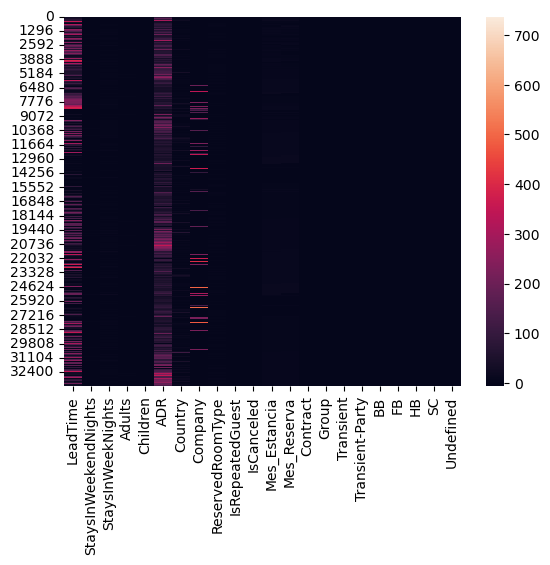

In [90]:
sns.heatmap(df)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33688 entries, 0 to 33687
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LeadTime              33688 non-null  int64  
 1   StaysInWeekendNights  33688 non-null  int64  
 2   StaysInWeekNights     33688 non-null  int64  
 3   Adults                33688 non-null  int64  
 4   Children              33688 non-null  int64  
 5   ADR                   33688 non-null  float64
 6   Country               33688 non-null  float64
 7   Company               33688 non-null  int32  
 8   ReservedRoomType      33688 non-null  float64
 9   IsRepeatedGuest       33688 non-null  uint8  
 10  IsCanceled            33688 non-null  uint8  
 11  Mes_Estancia          33688 non-null  int64  
 12  Mes_Reserva           33688 non-null  int64  
 13  Contract              33688 non-null  uint8  
 14  Group                 33688 non-null  uint8  
 15  Transient          

In [92]:
df["Mes_Estancia"].value_counts()

8     3938
7     3769
4     3016
5     2984
10    2971
3     2915
2     2641
9     2527
6     2478
12    2289
11    2154
1     2006
Name: Mes_Estancia, dtype: int64

In [93]:
df["ADR"].mean()

92.89293368558566

In [94]:
df

LeadTime  StaysInWeekendNights  StaysInWeekNights  Adults  Children  \
0           238                     0                  2       2         0   
1           174                     2                  5       2         1   
2           260                     4                  9       1         0   
3           168                     0                  2       2         0   
4             1                     0                  1       1         0   
...         ...                   ...                ...     ...       ...   
33683       212                     2                  8       2         1   
33684       169                     2                  9       2         0   
33685       204                     4                 10       2         0   
33686       211                     4                 10       2         0   
33687       161                     4                 10       2         0   

          ADR  Country  Company  ReservedRoomType  IsRepeatedGuest  ...  \
0       54.00      0.0        0               0.0                0  ...   
1      108.02      0.0        0               5.0                0  ...   
2       47.54      0.0        0               3.0                0  ...   
3       86.00      0.0        0               0.0                0  ...   
4       35.00      0.0       88               0.0                1  ...   
...       ...      ...      ...               ...              ...  ...   
33683   89.75      4.0        0               0.0                0  ...   
33684  202.27      5.0        0               4.0                0  ...   
33685  153.57      5.0        0               4.0                0  ...   
33686  112.80      4.0        0               3.0                0  ...   
33687   99.06     13.0        0               0.0                0  ...   

       Mes_Reserva  Contract  Group  Transient  Transient-Party  BB  FB  HB  \
0               12         0      0          1                0   0   0   1   
1               12         0      0          1                0   1   0   0   
2                8         0      0          1                0   1   0   0   
3                1         0      0          1                0   0   0   1   
4               11         0      0          1                0   1   0   0   
...            ...       ...    ...        ...              ...  ..  ..  ..   
33683            9         0      0          1                0   1   0   0   
33684            9         0      0          0                1   1   0   0   
33685            9         0      0          1                0   1   0   0   
33686            9         1      0          0                0   0   0   1   
33687            9         0      0          1                0   0   0   1   

       SC  Undefined  
0       0          0  
1       0          0  
2       0          0  
3       0          0  
4       0          0  
...    ..        ...  
33683   0          0  
33684   0          0  
33685   0          0  
33686   0          0  
33687   0          0  

[33688 rows x 22 columns]

In [95]:
df.to_csv("hotusa_EDA.csv", index = False)